# Simple tweaks to matplotlib bar charts

## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Data

In [2]:
df = pd.DataFrame.from_dict(
    {
        "Jan": 3.7,
        "Feb": 3.9,
        "Mar": 5.7,
        "Apr": 8.5,
        "May": 11.5,
        "Jun": 14.5,
        "Jul": 16.5,
        "Aug": 16.3,
        "Sep": 14.0,
        "Oct": 10.6,
        "Nov": 6.9,
        "Dec": 4.4
    },
    orient="index",
    columns=["temperature_C"]
)

df

,temperature_C
Jan,3.7
Feb,3.9
Mar,5.7
Apr,8.5
May,11.5
Jun,14.5
Jul,16.5
Aug,16.3
Sep,14.0
Oct,10.6


## Default bar chart

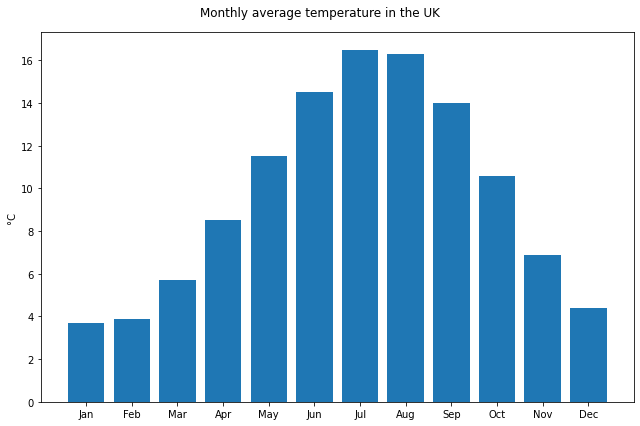

In [3]:
fig, ax = plt.subplots(
    figsize=(9,6),
    facecolor="white"
)
fig.suptitle("Monthly average temperature in the UK")

ax.bar(
    x=df.index,
    height=df["temperature_C"]
)
ax.set_ylabel("°C")

plt.tight_layout()

plt.savefig(
    fname="plot1.png",
    format="png",
    dpi=125
);

## Bar Chart - tweak 1

* remove spines
* remove ticks and ticklabels
* add bar labels

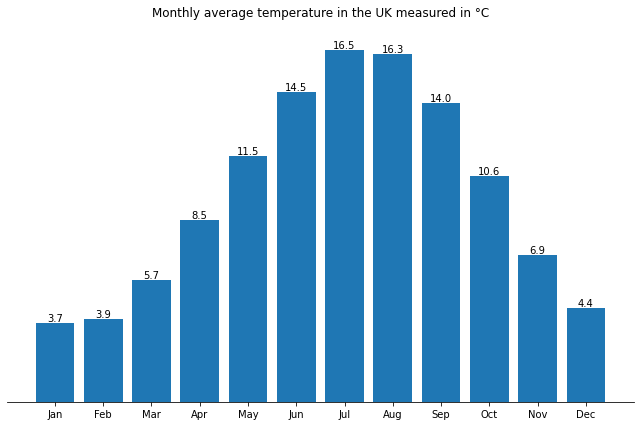

In [4]:
fig, ax = plt.subplots(
    figsize=(9,6),
    facecolor="white"
)
fig.suptitle("Monthly average temperature in the UK measured in °C")

ax.bar(
    x=df.index,
    height=df["temperature_C"]
)

# Remove spines
for position in ["left", "top", "right"]:
    ax.spines[position].set_visible(False)

# Remove `y` axis ticks and tick labels
ax.tick_params(
    axis="y",
    which="major",
    left=False,
    labelleft=False
)

# Add bar data labels
for x_val, y_val in enumerate(df["temperature_C"]):
    ax.text(
        x_val, y_val,
        f"{y_val}",
        ha="center",
        va="bottom"
    )

plt.tight_layout()

plt.savefig(
    fname="plot2.png",
    format="png",
    dpi=125
);

## Bar Chart - tweak 2

* update bar colours
* update all texts font colours
* update all texts font size

### Install preferred font: `San-Serif` fonts are recommended for the plots as they are easy to read

I went for **Roboto** font which is available in [Google Fonts](https://fonts.google.com/specimen/Roboto?query=rob&category=Sans+Serif).  

The colours I use come from the [GNOME colour palette](https://developer.gnome.org/hig/reference/palette.html).

In [5]:
# Import font manager

from matplotlib import font_manager

In [ ]:
# Check if Matplotlib sees your font of choice
font_manager.get_font_names()

In [ ]:
# You can check all the fonts from the system folder
font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

In [6]:
# And add them so matplotlib sees them
for font in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    font_manager.fontManager.addfont(font)

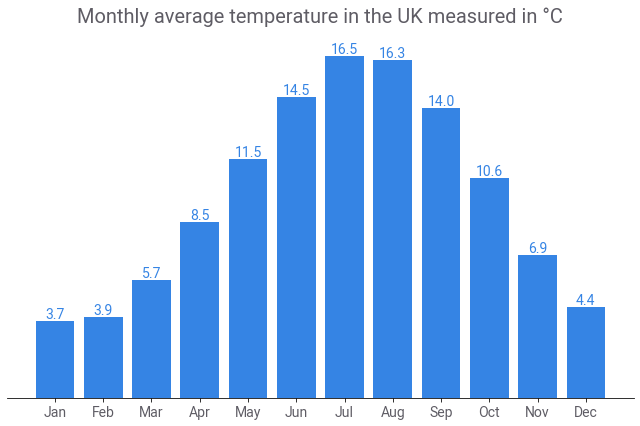

In [7]:
text_colour = "#5e5c64"  # dark 2
bar_colour = "#3584e4"  # blue 3
plt.rcParams["font.family"] = "Roboto"  # update font for the whole plot

fig, ax = plt.subplots(
    figsize=(9,6),
    facecolor="white"
)
fig.suptitle(
    "Monthly average temperature in the UK measured in °C",
    fontsize=20,
    color=text_colour
    )

ax.bar(
    x=df.index,
    height=df["temperature_C"],
    color=bar_colour
)

# Remove spines
for position in ["left", "top", "right"]:
    ax.spines[position].set_visible(False)

# Remove `y` axis ticks and tick labels
ax.tick_params(
    axis="y",
    which="major",
    left=False,
    labelleft=False
)

# Add bar data labels
for x_val, y_val in enumerate(df["temperature_C"]):
    ax.text(
        x_val, y_val,
        f"{y_val}",
        ha="center",
        va="bottom",
        fontsize=14,
        color=bar_colour,
    )

# Update apperance of the `x` axis tick labels
ax.tick_params(
    axis="x",
    labelsize=14,
    labelcolor=text_colour
)

plt.tight_layout()

plt.savefig(
    fname="plot3.png",
    format="png",
    dpi=125
);

I like stronger accent so my personal preference is to:
* add edges to the bars
* make the lines a bit thicker than default

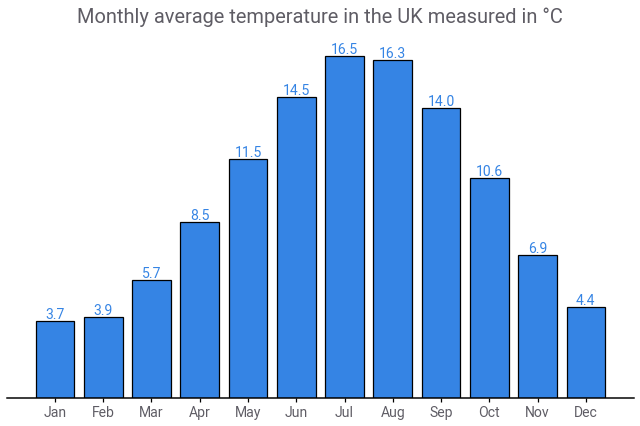

In [8]:
text_colour = "#5e5c64"  # dark 2
bar_colour = "#3584e4"  # blue 3
plt.rcParams["font.family"] = "Roboto"  # update font for the whole plot
line_width_val = 1.25

fig, ax = plt.subplots(
    figsize=(9,6),
    facecolor="white"
)
fig.suptitle(
    "Monthly average temperature in the UK measured in °C",
    fontsize=20,
    color=text_colour
    )

ax.bar(
    x=df.index,
    height=df["temperature_C"],
    color=bar_colour,
    edgecolor="black",
    linewidth=line_width_val
)

# Remove spines
for position in ["left", "top", "right"]:
    ax.spines[position].set_visible(False)

# Remove `y` axis ticks and tick labels
ax.tick_params(
    axis="y",
    which="major",
    left=False,
    labelleft=False
)

# Add bar data labels
for x_val, y_val in enumerate(df["temperature_C"]):
    ax.text(
        x_val, y_val,
        f"{y_val}",
        ha="center",
        va="bottom",
        fontsize=14,
        color=bar_colour,
    )

# Update apperance of the `x` axis tick labels
ax.tick_params(
    axis="x",
    labelsize=14,
    labelcolor=text_colour,
    width=line_width_val
)

# Update thickness of the bottom spine
ax.spines["bottom"].set_linewidth(1.5)

plt.tight_layout()

plt.savefig(
    fname="plot4.png",
    format="png",
    dpi=125
);

## Bar Chart - tweak 3

Tell a story with a plot by highlighting the important information.

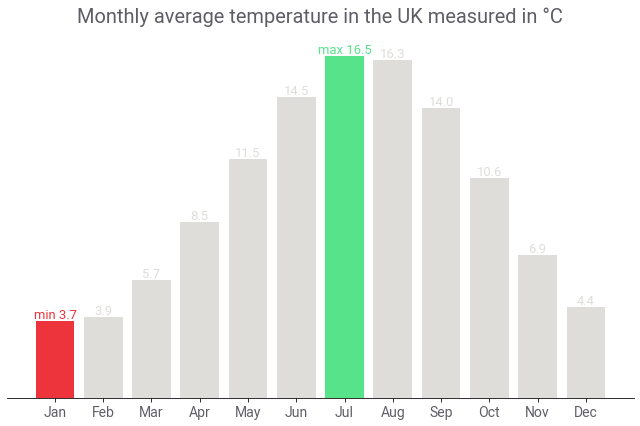

In [9]:
text_colour = "#5e5c64"  # dark 2
bar_colour = "#deddda"  # light 3
plt.rcParams["font.family"] = "Roboto"  # update font for the whole plot
col_min = "#ed333b"  # red 2
col_max = "#57e389"  # green 2

# Create a list of colours for every bar
all_colours = []
for val in df["temperature_C"]:
    if val == max(df["temperature_C"]):
        col = col_max
    elif val == min(df["temperature_C"]):
        col = col_min
    else:
        col = bar_colour

    all_colours.append(col)

fig, ax = plt.subplots(
    figsize=(9,6),
    facecolor="white"
)
fig.suptitle(
    "Monthly average temperature in the UK measured in °C",
    fontsize=20,
    color=text_colour
    )

ax.bar(
    x=df.index,
    height=df["temperature_C"],
    color=all_colours
)

# Remove spines
for position in ["left", "top", "right"]:
    ax.spines[position].set_visible(False)

# Remove `y` axis ticks and tick labels
ax.tick_params(
    axis="y",
    which="major",
    left=False,
    labelleft=False
)

# Add bar data labels
for x_val, y_val in enumerate(df["temperature_C"]):
    if y_val == max(df["temperature_C"]):
        col = col_max
        txt = f"max {y_val}"
    elif y_val == min(df["temperature_C"]):
        col = col_min
        txt = f"min {y_val}"
    else:
        col = bar_colour
        txt = f"{y_val}"

    ax.text(
        x_val, y_val,
        txt,
        ha="center",
        va="bottom",
        fontsize=13,
        color=col
    )

# Update appearance of the `x` axis tick labels
ax.tick_params(
    axis="x",
    labelsize=14,
    labelcolor=text_colour
)

plt.tight_layout()

plt.savefig(
    fname="plot5.png",
    format="png",
    dpi=125
);

##